## Training and Cost Function in Logistic Regression

### The Goal of Training

Objective: Set parameters θ so that:

- High probabilities for positive instances (y = 1)
- Low probabilities for negative instances (y = 0)

### Cost Function for Single Instance

- `c = -log(p), if y = 1 and -log(1 - p), if y - 0`


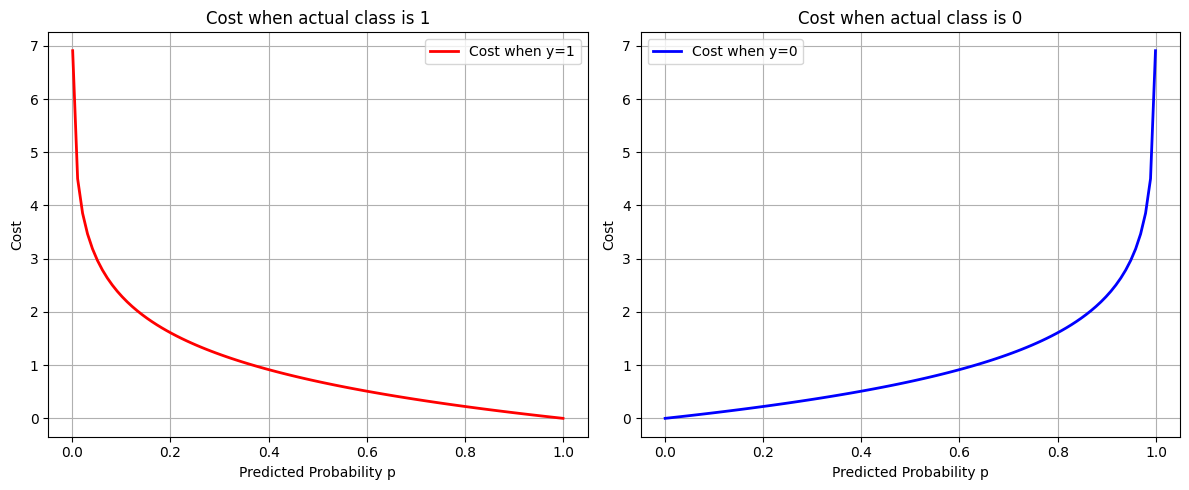

In [1]:
# why this makes sense?
import numpy as np
import matplotlib.pyplot as plt

# Cost function visualization
p_values = np.linspace(0.001, 0.999, 100)
cost_y1 = -np.log(p_values)  # When actual y = 1
cost_y0 = -np.log(1 - p_values)  # When actual y = 0

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(p_values, cost_y1, "r-", linewidth=2, label="Cost when y=1")
plt.xlabel("Predicted Probability p")
plt.ylabel("Cost")
plt.title("Cost when actual class is 1")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(p_values, cost_y0, "b-", linewidth=2, label="Cost when y=0")
plt.xlabel("Predicted Probability p")
plt.ylabel("Cost")
plt.title("Cost when actual class is 0")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Key Behavior:

### When y = 1 (Positive instance):

- If model predicts p ≈ 0 (wrong) → Cost ≈ ∞ (huge penalty)
- If model predicts p ≈ 1 (correct) → Cost ≈ 0 (no penalty)

### When y = 0 (Negative instance):

- If model predicts p ≈ 1 (wrong) → Cost ≈ ∞ (huge penalty)
- If model predicts p ≈ 0 (correct) → Cost ≈ 0 (no penalty)

### Complete Cost Function (Log Loss)

- Equation: `J(θ) = -1/m × Σ [y⁽ⁱ⁾log(p⁽ⁱ⁾) + (1-y⁽ⁱ⁾)log(1-p⁽ⁱ⁾)]`
- Single expression that works for both cases:
  - When y = 1: second term becomes 0
  - When y = 0: first term becomes 0


In [2]:
# practical example
def log_loss(y_true, y_pred):
    """Calculate log loss for binary classification"""
    epsilon = 1e-15  # Avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


# Example predictions
y_true = np.array([1, 0, 1, 0, 1])  # Actual labels
y_pred_good = np.array([0.9, 0.1, 0.8, 0.2, 0.95])  # Good predictions
y_pred_bad = np.array([0.1, 0.9, 0.2, 0.8, 0.05])  # Bad predictions

print("=== Log Loss Examples ===")
print(f"Good predictions loss: {log_loss(y_true, y_pred_good):.4f}")
print(f"Bad predictions loss:  {log_loss(y_true, y_pred_bad):.4f}")

# Show individual costs
print("\n=== Individual Instance Costs ===")
for i, (true, pred_good, pred_bad) in enumerate(zip(y_true, y_pred_good, y_pred_bad)):
    if true == 1:
        cost_good = -np.log(pred_good)
        cost_bad = -np.log(pred_bad)
    else:
        cost_good = -np.log(1 - pred_good)
        cost_bad = -np.log(1 - pred_bad)

    print(
        f"Instance {i}: y={true} | Good pred: {pred_good:.2f} (cost: {cost_good:.2f}) | "
        f"Bad pred: {pred_bad:.2f} (cost: {cost_bad:.2f})"
    )

=== Log Loss Examples ===
Good predictions loss: 0.1417
Bad predictions loss:  2.1640

=== Individual Instance Costs ===
Instance 0: y=1 | Good pred: 0.90 (cost: 0.11) | Bad pred: 0.10 (cost: 2.30)
Instance 1: y=0 | Good pred: 0.10 (cost: 0.11) | Bad pred: 0.90 (cost: 2.30)
Instance 2: y=1 | Good pred: 0.80 (cost: 0.22) | Bad pred: 0.20 (cost: 1.61)
Instance 3: y=0 | Good pred: 0.20 (cost: 0.22) | Bad pred: 0.80 (cost: 1.61)
Instance 4: y=1 | Good pred: 0.95 (cost: 0.05) | Bad pred: 0.05 (cost: 3.00)
